In [1]:
import os, collections, random, string
import pandas as pd

In [3]:
# Define tf and datapaths
TF = 'ctcf'

bedpath = "/home/yogesh/data/tfbind/encodeDream/%s/"%(TF)
outpath = "/home/yogesh/data/tfbind/encodeDream/%s/fasta_out/"%(TF)
refpath = "/home/yogesh/projects/202104_tfbind/data/reference/hg19.fa"

file_ = 'test_chr_test_celline_trim.tsv'

## Extract fasta from bedfile
#cmd = "bedtools getfasta -fi %s -bed %s -fo %s"%(refpath, bedpath+file_, outpath+file_.split('.')[0]+'.fa')
#os.system(cmd)

In [4]:
# Import bedfile to df
bed = pd.read_csv(bedpath+file_, sep='\t', header=None)
print(collections.Counter(bed[3]))
bed

Counter({'U': 8505486, 'A': 257581, 'B': 79944})


,0,1,2,3,4
0,chr1,600,800,U,U
1,chr1,650,850,U,U
2,chr1,700,900,U,U
3,chr1,750,950,U,U
4,chr1,800,1000,U,U
...,...,...,...,...,...
8843006,chr8,146363200,146363400,U,U
8843007,chr8,146363250,146363450,U,U
8843008,chr8,146363300,146363500,U,U
8843009,chr8,146363350,146363550,U,U


In [5]:
# Filter fasta file
from tqdm import tqdm
filepath = outpath+file_.split('.')[0]+'.fa'
n_count, t_seq, n_seqs = [], 0, 0

dict_ = {}

with open(filepath) as fp:
    for cnt, line in tqdm(enumerate(fp)):
        # print(cnt, line)
        if cnt%2==0:
            key = line[1:].rstrip("\n")
            key_ = key
        else:
            l = line.rstrip("\n").upper()
            if 'N' in l:
                n_seqs+=1
                n_count.append(l.count('N'))
                dict_[key_] = 'NP' # N-Absent
            else:
                dict_[key_] = 'NA' # N-present
            t_seq+=1

17686022it [00:18, 970838.86it/s] 


In [6]:
# Map presese/absence (in dict_) of "N" to the bed file
na_list = []
for row in tqdm(range(len(bed))):
    #print(bed.iloc[row])
    if dict_[bed.iloc[row][0]+':'+str(bed.iloc[row][1])+'-'+str(bed.iloc[row][2])] == 'NP':
        na_list.append('NP')
    else:
        na_list.append('NA')
        
# Add na_list to bed df
bed[5] = na_list

100%|██████████| 8843011/8843011 [55:55<00:00, 2635.37it/s]


In [8]:
len(na_list), len(bed)

(8843011, 8843011)

In [11]:
collections.Counter(na_list)

Counter({'NP': 809361, 'NA': 8033650})

In [19]:
# selecting rows based on condition
U_bed_np = bed[(bed[3]=='U') & (bed[5]=='NP')]
B_bed_np = bed[(bed[3]=='B') & (bed[5]=='NP')]
A_bed_np = bed[(bed[3]=='A') & (bed[5]=='NP')]

# selecting rows based on condition
U_bed_na = bed[(bed[3]=='U') & (bed[5]=='NA')]
B_bed_na = bed[(bed[3]=='B') & (bed[5]=='NA')]
A_bed_na = bed[(bed[3]=='A') & (bed[5]=='NA')]

# Total sequences
Unbound: 8505486 Bound: 79944 Ambigious: 257581

# For seqs without any 'N'
Unbound: 7696128 Bound: 79944 Ambigious: 257578

# For seqs containing 'N'
Unbound: 809358 Bound: 0 Ambigious: 3
Fraction of total sequences with "N": 0.09152549962902908


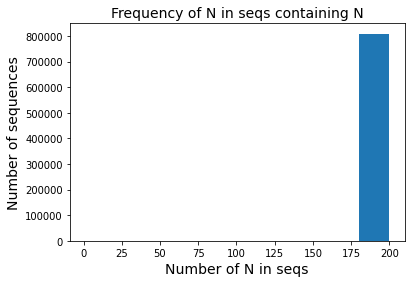

In [39]:
# Plot/Display statistics
import matplotlib.pyplot as plt
plt.hist(n_count)
plt.xlabel('Number of N in seqs', fontsize=14)
plt.ylabel('Number of sequences', fontsize=14)
plt.title("Frequency of N in seqs containing N", fontsize=14)

print("# Total sequences")
print('Unbound:', len(bed[bed[3]=='U']), 'Bound:', len(bed[bed[3]=='B']), 'Ambigious:', len(bed[bed[3]=='A']))
print()
print("# For seqs without any 'N'")
print('Unbound:', len(U_bed_na), 'Bound:', len(B_bed_na), 'Ambigious:', len(A_bed_na))
print()
print("# For seqs containing 'N'")
print('Unbound:', len(U_bed_np), 'Bound:', len(B_bed_np), 'Ambigious:', len(A_bed_np))
print('Fraction of total sequences with "N":', n_seqs/t_seq)
# print(collections.Counter(n_count))

In [41]:
bed.to_csv('/home/yogesh/projects/202104_tfbind/data/processed_bed.csv')

In [17]:
l = 'NNNNNNNNNNNgahsjcnnnnn\n'
l_ = l.rstrip("\n").upper()
l_.count('N')
l_

'NNNNNNNNNNNGAHSJCNNNNN'